Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 3)
Team shape: (155541, 33)
Opponent shape: (155541, 33)
Total shape: (88002, 71)

=== DataFrame Overview ===
Shape: (88002, 71)

Columns:
['Time', 'half', 'Ball_x', 'Ball_y', 'game', 'FCKplayer_0_x', 'FCKplayer_0_y', 'FCKplayer_0_number', 'FCKplayer_1_x', 'FCKplayer_1_y', 'FCKplayer_1_number', 'FCKplayer_2_x', 'FCKplayer_2_y', 'FCKplayer_2_number', 'FCKplayer_3_x', 'FCKplayer_3_y', 'FCKplayer_3_number', 'FCKplayer_4_x', 'FCKplayer_4_y', 'FCKplayer_4_number', 'FCKplayer_5_x', 'FCKplayer_5_y', 'FCKplayer_5_number', 'FCKplayer_6_x', 'FCKplayer_6_y', 'FCKplayer_6_number', 'FCKplayer_7_x', 'FCKplayer_7_y', 'FCKplayer_7_number', 'FCKplayer_8_x', 'FCKplayer_8_y', 'FCKplayer_8_number', 'FCKplayer_9_x', 'FCKplayer_9_y', 'FCKplayer_9_number', 'FCKplayer_10_x', 'FCKplayer_10_y', 'FCKplayer_10_number', 'RFCplayer_0_x', 'RFCplayer_0_y

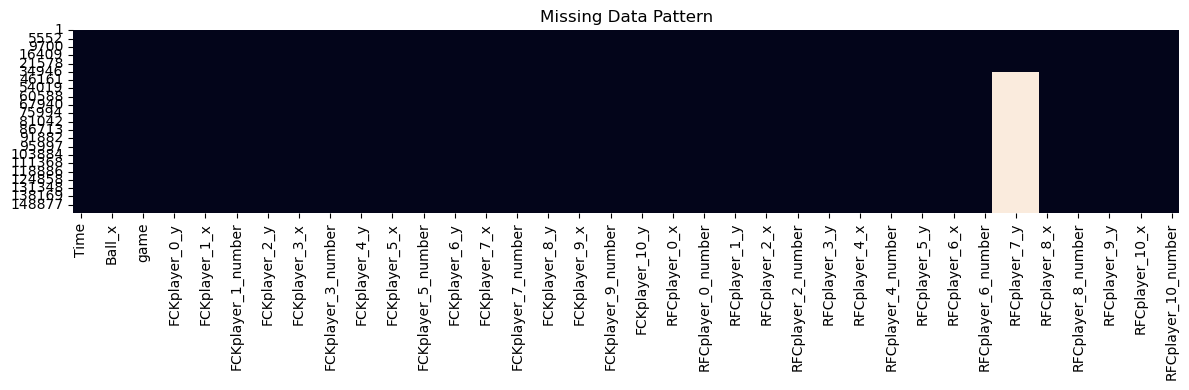

In [2]:
from data_loader import FootballDataLoader
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
data_dir = r"/Users/kirlo\Documents\Sanvi University Work\Year 3\AML\final project\FootballData\RestructuredData_2425"
team = "FCK"
save_dir = r"/Users/kirlo\Documents\Sanvi University Work\Year 3\AML\final project"

loader = FootballDataLoader(data_dir, team)

# Load first game as DataFrame
datasets = loader.load_all_games(n_games=1, just_game=True, speed=True, z=True, col5=True, save= False, verbose=True)
df = datasets[0]


Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 6)
Team shape: (155541, 55)
Opponent shape: (155541, 55)
Total shape: (88002, 118)


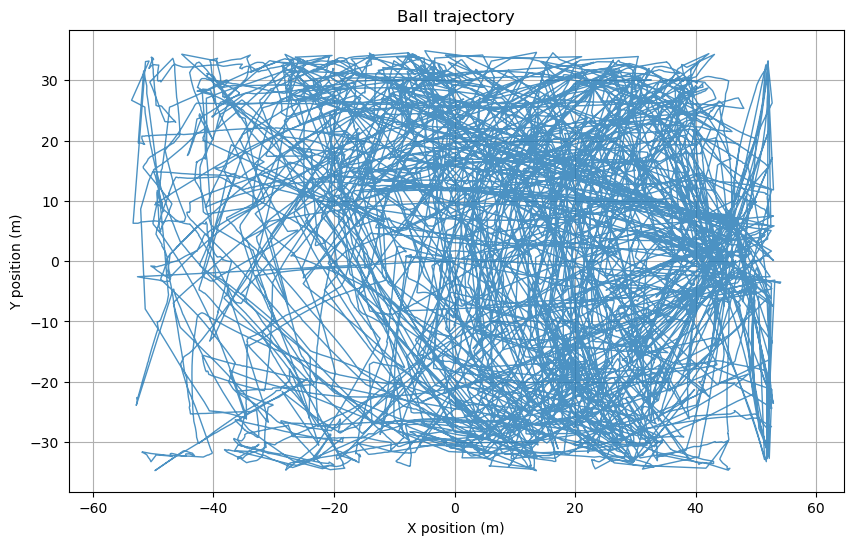

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df["Ball_x"], df["Ball_y"], lw=1, alpha=0.8)
plt.title("Ball trajectory")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.grid(True)
plt.axis("equal")
plt.show()

KeyError: 'FCK_0_x'

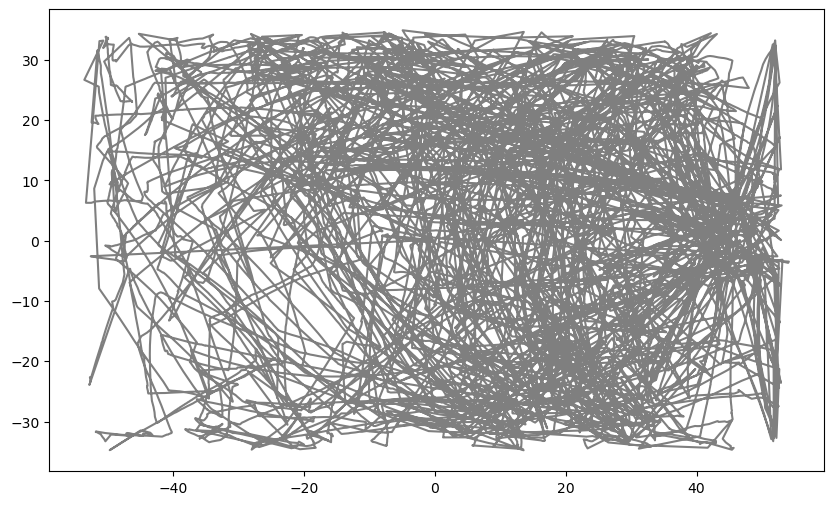

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df["Ball_x"], df["Ball_y"], label="Ball", color="black", alpha=0.5)

for i in range(11):
    plt.plot(df[f"homeplayer_{i}_x"], df[f"homeplayer_{i}_y"], alpha=0.4, label=f"Home P{i}")
    plt.plot(df[f"awayplayer_{i}_x"], df[f"awayplayer_{i}_y"], alpha=0.4, linestyle='--', label=f"Away P{i}")
#homrplayer for FCN?
plt.title("Player and Ball Movement")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.axis("equal")
plt.grid(True)
plt.show()


In [7]:
xg_files, _ = loader.sort_games()
xg_data = loader.load_machine_learning_xg(xg_files[0])

# Quick view of XG shot positions
plt.scatter(xg_data["x"], xg_data["y"], c=xg_data["value"], cmap="plasma", s=100)
plt.title("Expected Goals (XG) - Shot Positions")
plt.colorbar(label="XG Value")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


AttributeError: 'FootballDataLoader' object has no attribute 'load_machine_learning_xg'